In [1]:
import numpy as np
from scipy.stats import norm, binom, poisson
from scipy import stats
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

In [12]:
p_max = 60

In [13]:
xs = np.linspace(0,1,100)
ys = p_max*(1-x)*x
# p* f^-1(1-p)

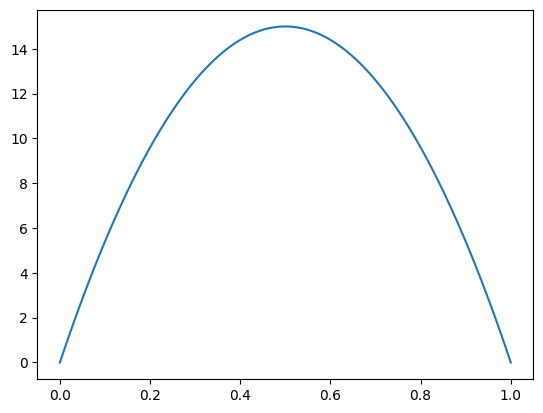

In [14]:
plt.plot(xs,ys)

In [21]:
def F(x):
    if x == 0:
        return 0
    elif x > p_max:
        return 1
    else:
        return x/p_max
xs = np.linspace(0,p_max,100)
ys = xs * (1-np.array([F(xi) for xi in xs]))
# pi * (1-F(pi))

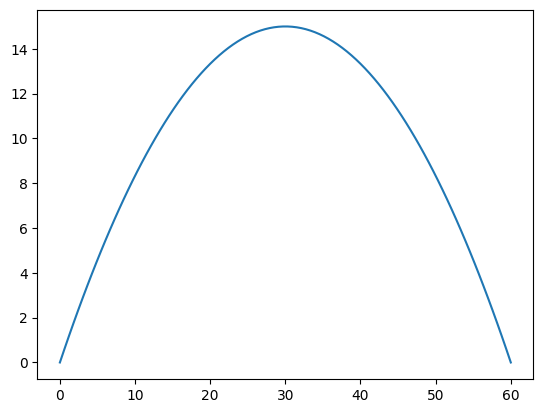

In [22]:
plt.plot(xs, ys)

### EX1

In [2]:
num_experiments = 10000
experiments = [[50, p] for p in [0.1, 0.3, 0.5, 0.7, 0.9]]
results = np.zeros((num_experiments, len(experiments)))

In [3]:
def get_mle(ns):
    p_hat = np.sum(ns) / (5*50)
    return 1 - ((1-p_hat)**5 + 5*p_hat*(1-p_hat)**4 + 10*p_hat**2*(1-p_hat)**3)

In [4]:
for i in range(num_experiments):
    for j, (n, p) in enumerate(experiments):
        ns = np.random.binomial(5, p, n)
        mle = get_mle(ns)
        results[i][j] = mle

In [5]:
for j, (n, p) in enumerate(experiments):
    true_value = 1 - ((1-p)**5 + 5*p*(1-p)**4 + 10*p**2*(1-p)**3)
    var = results[:,j].var()
    mse = ((results[:,j] - true_value)**2).mean()
    bias = (results[:,j] - true_value).mean()
    print(f'p:{p}\nvar: {var}\nmse: {mse}\nbias: {bias}\n\n')

p:0.1
var: 2.438969152184836e-05
mse: 2.5048177124424063e-05
bias: 0.0008114712580096146


p:0.3
var: 0.0014731437790918233
mse: 0.0014775121321002542
bias: 0.0020900605274563086


p:0.5
var: 0.003490088455177184
mse: 0.0034900951418213246
bias: 8.17719031258875e-05


p:0.7
var: 0.0014881800689048991
mse: 0.0014949164644727534
bias: -0.0025954567166213047


p:0.9
var: 2.4641375160164514e-05
mse: 2.5247386617886154e-05
bias: -0.0007784673774292902




### EX2

In [6]:
num_experiments = 10000
experiments = [[50, lam] for lam in [0.5, 1, 2, 5]]
results = np.zeros((num_experiments, len(experiments), 11))

In [7]:
def get_mle(ns, k):
    lam = ns.mean()
    return np.power(lam, k)*np.exp(-lam) / np.math.factorial(k)

In [8]:
for i in range(num_experiments):
    for j, (n, lam) in enumerate(experiments):
        for k in range(11):
            ns = np.random.poisson(lam=lam, size=n)
            mle = get_mle(ns, k)
            results[i][j][k] = mle

In [9]:
for j, (n, lam) in enumerate(experiments):
    for k in range(11):
        true_value = np.power(lam, k)*np.exp(-lam) / np.math.factorial(k)
        var = results[:,j,k].var()
        mse = ((results[:,j,k] - true_value)**2).mean()
        bias = (results[:,j,k] - true_value).mean()
        mean = results[:,j,k].mean()
        print(f'p:{lam} x:{k}\nvar: {var}\nmse: {mse}\nbias: {bias}\nmean: {mean}\ntrue_value: {true_value}\n\n')

p:0.5 x:0
var: 0.0036855240998371593
mse: 0.0036935273132327586
bias: 0.0028289951211692157
mean: 0.6093596548338028
true_value: 0.6065306597126334


p:0.5 x:1
var: 0.0009530956308384656
mse: 0.0009701528021269793
bias: -0.004130032843515122
mean: 0.29913529701280156
true_value: 0.3032653298563167


p:0.5 x:2
var: 0.000510580610520765
mse: 0.0005109371447404212
bias: 0.0005971048648739797
mean: 0.07641343732895316
true_value: 0.07581633246407918


p:0.5 x:3
var: 4.231388683604918e-05
mse: 4.291796979357494e-05
bias: 0.0007772277385205405
mean: 0.013413283149200407
true_value: 0.012636055410679864


p:0.5 x:4
var: 1.5902496757452263e-06
mse: 1.6625550643793452e-06
bias: 0.00026889661328123593
mean: 0.0018484035396162189
true_value: 0.001579506926334983


p:0.5 x:5
var: 3.618211089161267e-08
mse: 3.866872501810161e-08
bias: 4.986596160196804e-05
mean: 0.0002078166542354663
true_value: 0.0001579506926334983


p:0.5 x:6
var: 5.159888944059641e-10
mse: 5.618973299569132e-10
bias: 6.77557639

### EX3

In [23]:
num_experiments = 10000
experiments = [[50, t] for t in [0.5, 1, 2, 5]]
results = np.zeros((num_experiments, len(experiments), 3))

In [24]:
def get_mle(ns):
    n = len(ns)
    t = -n / np.sum(np.log(ns))
    return  t, 1/t**2

In [25]:
for i in range(num_experiments):
    for j, (n, beta) in enumerate(experiments):
        ns = np.random.beta(beta, 1, size=n)
        mle_t, mle_f = get_mle(ns)
        results[i][j][0] = mle_t
        results[i][j][1] = mle_f
        results[i][j][2] = np.sqrt(mle_f*n)*(mle_t-beta)

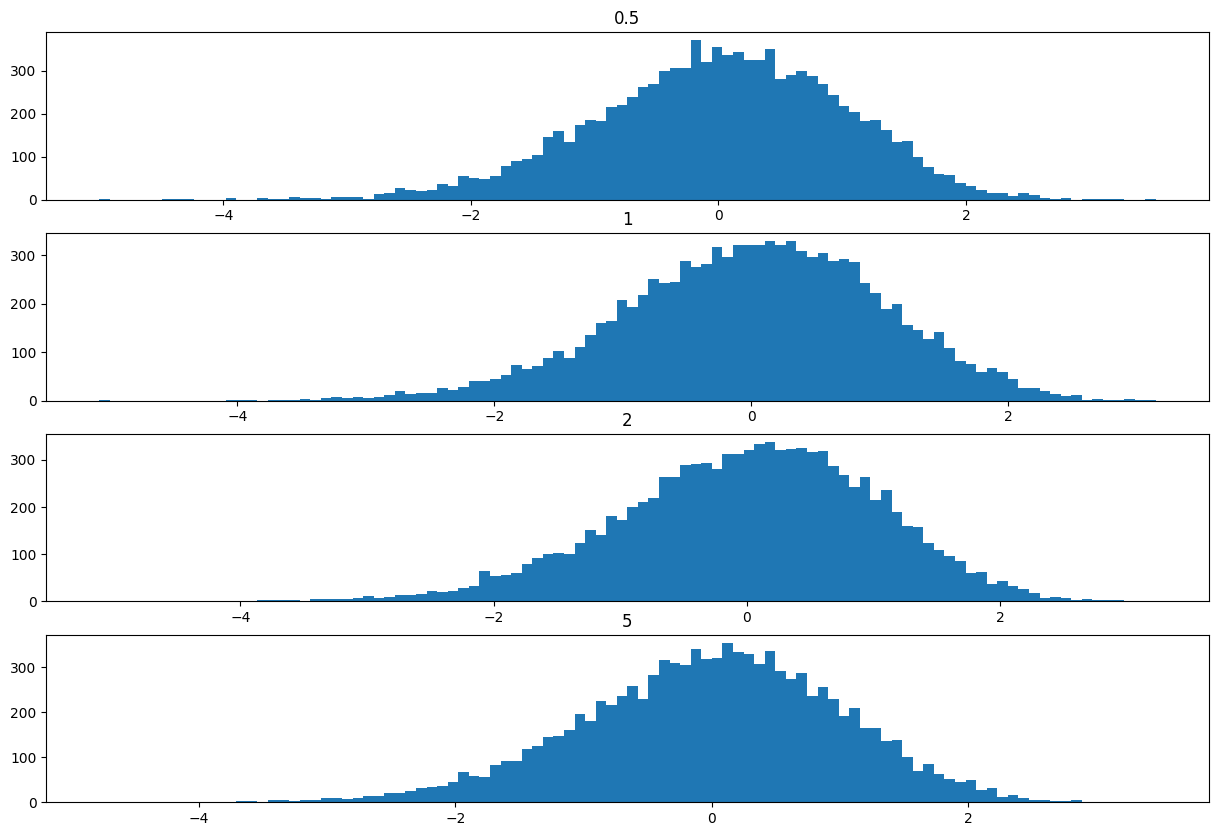

In [26]:
fig, axs = plt.subplots(4, figsize=(15, 10))
for j, (n, beta) in enumerate(experiments):
    axs[j].set_title(f'{beta}')
    axs[j].hist(results[:,j,2], bins=int(np.sqrt(len(results[:,j,2]))))

ShapiroResult(statistic=0.9949460029602051, pvalue=2.94512880131468e-18)


/home/maurycy/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


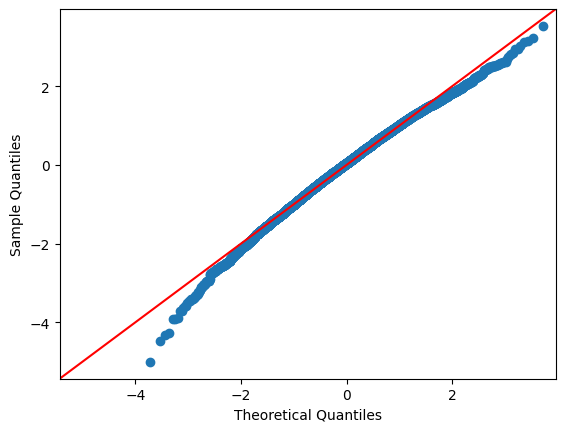

ShapiroResult(statistic=0.9955108165740967, pvalue=4.496093566545434e-17)


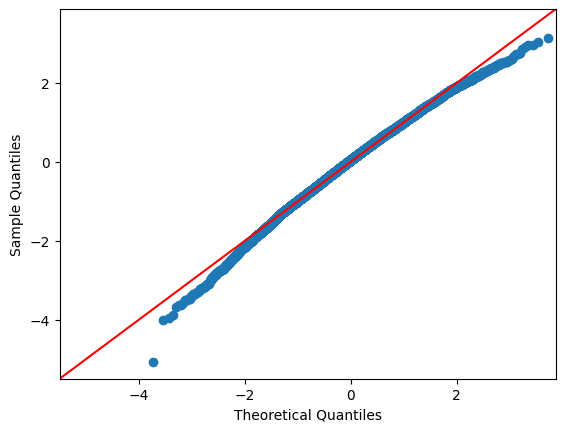

ShapiroResult(statistic=0.994160532951355, pvalue=9.287180020961922e-20)


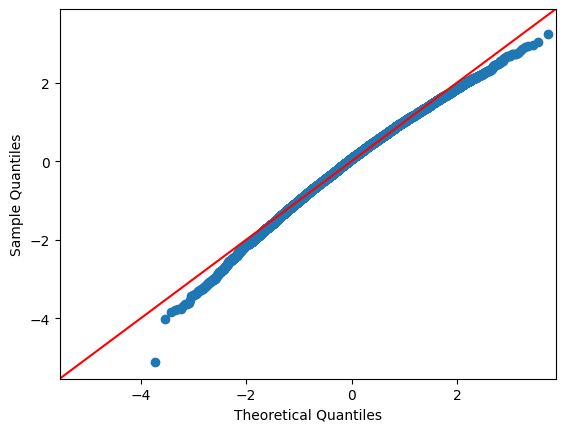

ShapiroResult(statistic=0.9959307909011841, pvalue=3.9920969853538555e-16)


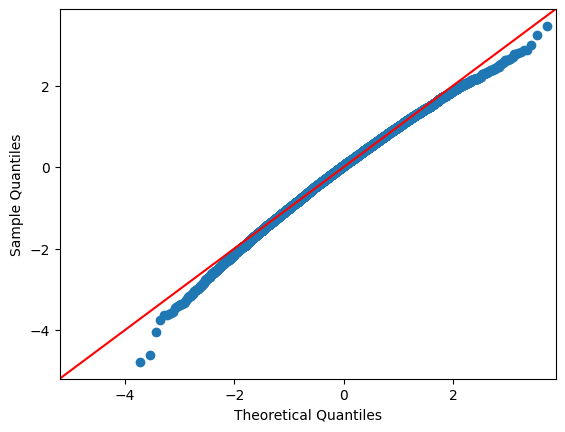

In [27]:
for j, (n, beta) in enumerate(experiments):
    print(stats.shapiro(results[:,j,2]))
    sm.qqplot(results[:,j,2], line ='45')
    py.show()

### EX4

In [14]:
NUM_SAMPLES = 100
NUM_EXP = 10000
summary = np.zeros((3,4,3))
estimators = ['t1', 't2', 't3', 't4']

In [15]:
def weights_4(i):
    return norm.pdf(norm.ppf((i-1)/NUM_SAMPLES)) - norm.pdf(norm.ppf(i/NUM_SAMPLES))
ws_4 = np.arange(1, NUM_SAMPLES + 1)
ws_4 = np.vectorize(weights_4)(ws_4)

def get_estimators(ns):
    t1 = np.sum(ns) / len(ns)
    
    t2 = np.median(ns)
    
    ws = np.random.randint(1, 100, NUM_SAMPLES)
    ws = ws / np.sum(ws)
    t3 = ns@ws
    
    ns_sorted = np.sort(ns)

    t4 = ns_sorted@ws_4
    
    return t1, t2, t3, t4

In [18]:
for i, (theta, sigma) in enumerate([(1,1), (4,1), (1,2)]):
    results = np.zeros((4, NUM_EXP))
    for j in tqdm(range(NUM_EXP)):
        ns = np.random.laplace(theta, sigma, NUM_SAMPLES)
        t1, t2, t3, t4 = get_estimators(ns)
        results[:, j] = np.array([t1, t2, t3, t4])
    
    print(f'mu: {theta} sigma: {sigma}')
    for j in range(4):
        var = results[j, :].var()
        mse = np.square(results[j, :] - theta).mean()
        bias = (results[j, :] - theta).mean()
        # print(f't_{j}:\nvar:{var}\nmse:{mse}\nbias{bias}\n##########\n')
        summary[i , j, :] = np.array([var, mse, bias]) 
        

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 10685.19it/s]


mu: 1 sigma: 1


100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 14876.44it/s]


mu: 4 sigma: 1


100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 14898.72it/s]

mu: 1 sigma: 2


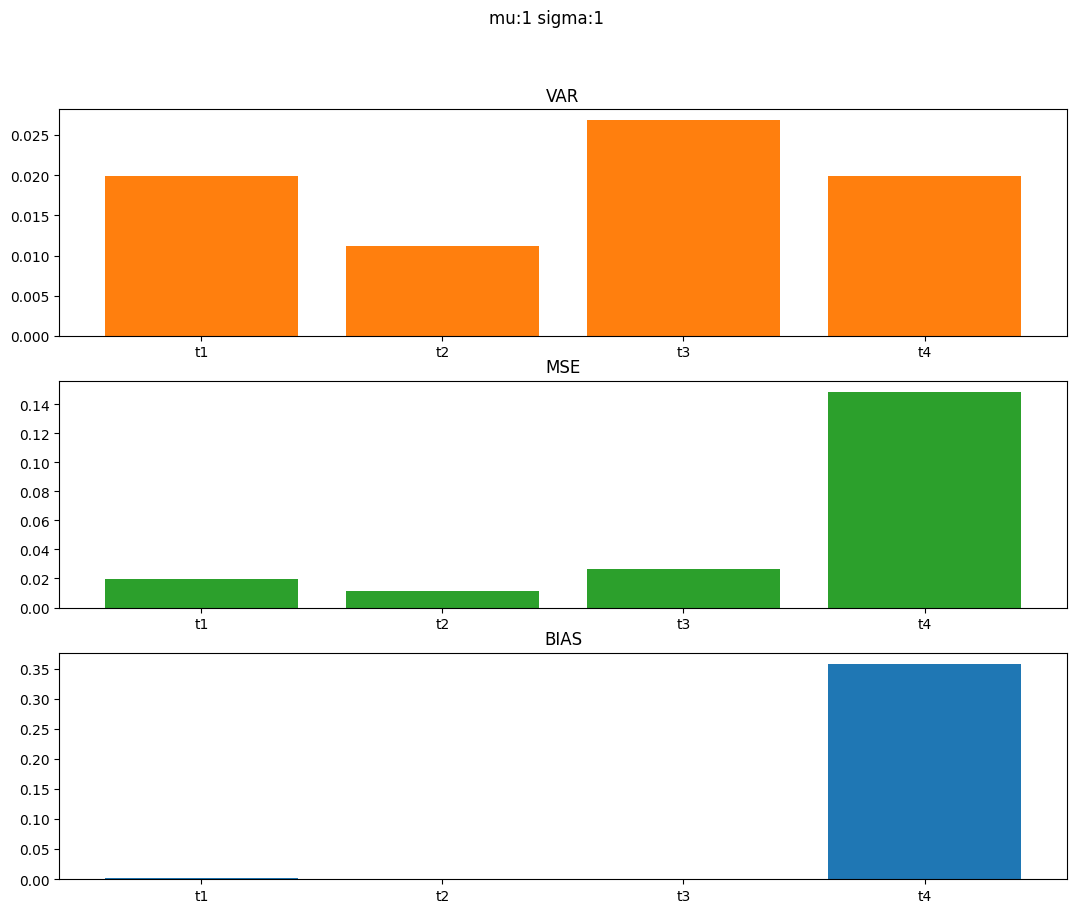

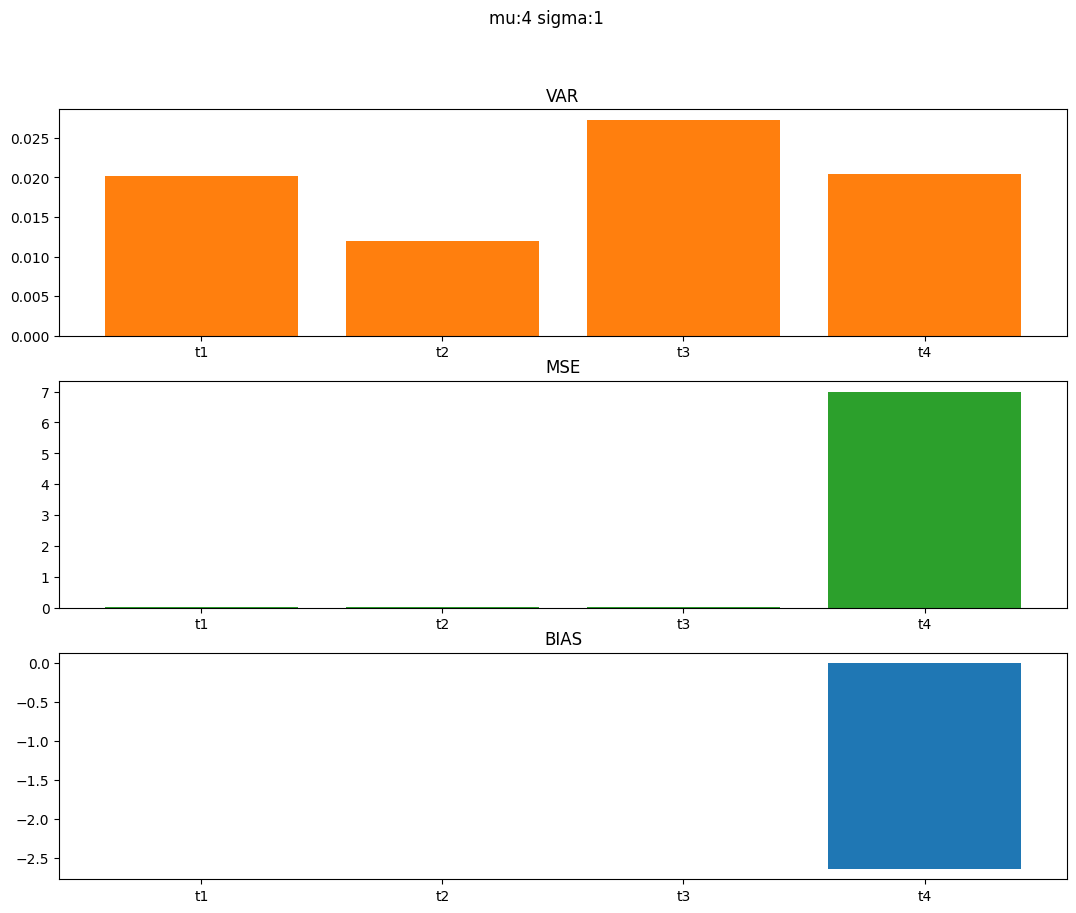

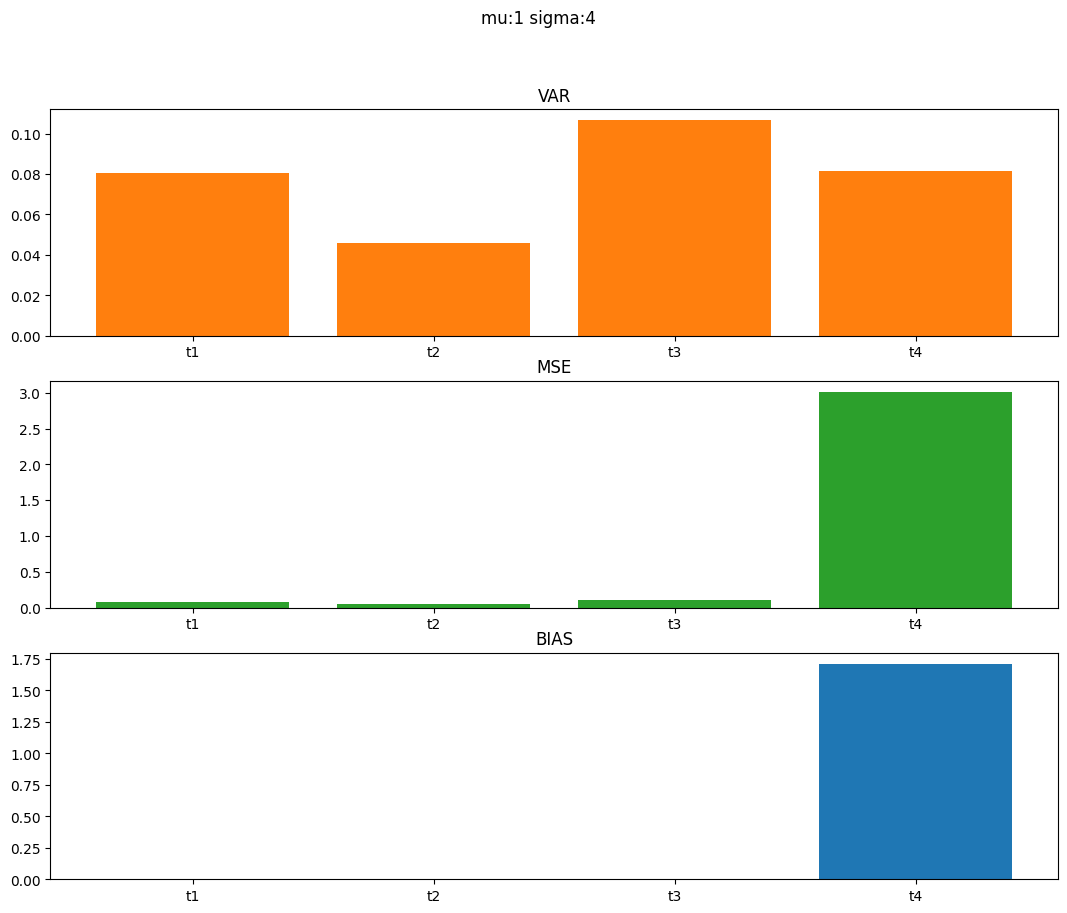

In [19]:
for i, (mu, sigma) in enumerate([(1,1), (4,1), (1,4)]):
    fig, axs = plt.subplots(3)
    fig.suptitle(f'mu:{mu} sigma:{sigma}')
    fig.set_figheight(10)
    fig.set_figwidth(13)
    axs[0].bar(estimators, summary[i,:,0], color='C1')
    axs[0].set_title('VAR')
    axs[1].bar(estimators, summary[i,:,1], color='C2')
    axs[1].set_title('MSE')
    axs[2].bar(estimators, summary[i,:,2])
    axs[2].set_title('BIAS')